<a href="https://colab.research.google.com/github/hdawit/Predicting-Diabetes-with-Social-Determinants/blob/main/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction:**

* Predicting "Newly_Diagnosed" cases of diabetes is of significant importance for understanding disease prevalence and developing effective prevention and management strategies. In this modeling file, I will build and compare various regression models, including Linear Regression, Decision Tree, Random Forest, and Gradient Boosting, to accurately predict the number of "Newly_Diagnosed" diabetes cases.

* The dataset used for modeling comprises comprehensive demographic, socioeconomic, and health-related factors for different regions. Before Modeling, all the necessary preprocessing steps, such as handling missing values, scaling features, and addressing multicollinearity have lready been performed.

* To evaluate the performance of each model, I will use appropriate evaluation metrics and techniques, including cross-validation, to ensure robustness. Specifically, I will assess the R-squared scores on the testing data to identify the model that exhibits the strongest relationship between the predictors and the target variable.

* Depending on the accuracy of the predictions achieved by the initial models, I may explore other advanced techniques to further improve the model's performance. This could involve leveraging Support Vector Machines (SVM), Ensemble methods, or even deep neural networks to capture complex relationships and enhance predictive accuracy.

* By continuously refining the modeling approach and potentially introducing additional models, we aim to uncover deeper insights into the factors contributing to "Newly_Diagnosed" diabetes cases. The ultimate goal is to provide valuable information for informed decision-making in diabetes prevention and management strategies.






In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import time

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFECV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import scipy.stats as stats

In [ ]:
# Load the preprocessed dataset
diabetes = pd.read_csv('/content/drive/MyDrive/Capstone-Project/Diabetes_Data/modified_dataset.csv')

# Display the first few rows of the dataset
print(diabetes.head())

        State            County  CountyFIPS  Population_Aged_65_or_Older  \
0  Washington  Jefferson County     30103.0                       0.9946   
1        Iowa        Ida County     48431.0                       0.8138   
2   Minnesota       Lake County     48173.0                       0.9233   
3    Colorado    Douglas County     30109.0                       0.0331   
4  New Mexico       Taos County     48155.0                       0.8988   

   Population_Below_Poverty  Population_Children_in_Poverty  \
0                    0.3962                            16.6   
1                    0.2175                            13.6   
2                    0.1048                             8.9   
3                    0.0013                             2.6   
4                    0.7624                            26.6   

   Population_Enrolled_in_Free_or_Reduced_Lunch  Population_Food_Insecurity  \
0                                     48.246242                        13.2   
1     

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         3020 non-null   object 
 1   County                                        3020 non-null   object 
 2   CountyFIPS                                    3020 non-null   float64
 3   Population_Aged_65_or_Older                   3020 non-null   float64
 4   Population_Below_Poverty                      3020 non-null   float64
 5   Population_Children_in_Poverty                3020 non-null   float64
 6   Population_Enrolled_in_Free_or_Reduced_Lunch  3020 non-null   float64
 7   Population_Food_Insecurity                    3020 non-null   float64
 8   Population_Minority                           3020 non-null   float64
 9   Population_No_Health_Insurance                3020 non-null   f

### **Build a Base Model**


In [ ]:
# Define feature and target variables
X = diabetes.drop(columns=['Newly_Diagnosed'])
y = diabetes['Newly_Diagnosed']

# Define categorical and numerical features
categorical_features = ['County', 'State']
numerical_features = list(set(X.columns) - set(categorical_features))

# Preprocessing pipelines for both numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that pre-processes the data and then trains a linear regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Train the model
model.fit(X_train, y_train)

# Make predictions using the model
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Display evaluation metrics
print("Model Evaluation Metrics - Linear Regression:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Model Evaluation Metrics - Linear Regression:
Mean Squared Error (MSE): 1951647.9459007524
Mean Absolute Error (MAE): 686.6241509462784
R-squared (R2): -0.17275772580032456


**Key Observation:** The current performance of the linear regression model is unfortunately suboptimal. With high MSE and MAE values and a negative R-squared score, it's evident that the model struggles to accurately predict the number of "Newly_Diagnosed" diabetes cases. This suggests that the linear relationship assumed by this model might not be a suitable representation of the underlying data.

**Next Steps for Enhancing Model Performance:**

**Outlier Management:** Review the distribution of the target variable to identify potential outliers. These extreme values might be negatively impacting the model's predictive performance. Depending on the findings, techniques such as winsorization or log transformations could be implemented to moderate the outliers' influence.

**Feature Engineering:** Investigate possibilities for further feature engineering. This process could include developing new variables that encapsulate existing ones' interactions or meaningful information, thus helping the model capture complex patterns more effectively.

**Feature Selection:** Evaluate the impact of each predictor variable on the model. Correlation analysis or feature importance from tree-based models could be employed to identify key variables influencing the target prediction. Removing less impactful variables might enhance the model's performance by reducing potential noise.

**Explore Alternative Models:** The nature of our dataset might not be best suited for a linear regression model. Thus, testing other models such as decision trees, random forests, or gradient boosting algorithms might be beneficial. These models can adapt to non-linear relationships more effectively.

**Enhanced Model Evaluation and Validation:** Despite using a train-test split for the initial model evaluation, incorporating cross-validation techniques can provide a more robust understanding of the model's performance. Cross-validation allows us to obtain a more reliable estimate of how well our model will generalize to unseen data.

**Hyperparameter Tuning:** Fine-tuning the chosen models' hyperparameters using methods like grid search or randomized search might optimize the models' performance. This can lead to a substantial improvement in predictive accuracy.

Leveraging Ensemble Methods: Implementing ensemble methods, such as bagging, boosting, or stacking, can help achieve more accurate predictions by combining the strengths of different models. These techniques work by integrating the outputs of multiple models, therefore improving the overall prediction accuracy.


### **Calculate and Visualize Outliers**

In [ ]:
# Calculating IQR
Q1 = diabetes['Newly_Diagnosed'].quantile(0.25)
Q3 = diabetes['Newly_Diagnosed'].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = diabetes[(diabetes['Newly_Diagnosed'] < Q1 - 1.5 * IQR) | (diabetes['Newly_Diagnosed'] > Q3 + 1.5 * IQR)]
print("Number of outliers detected: ", len(outliers))

Number of outliers detected:  360


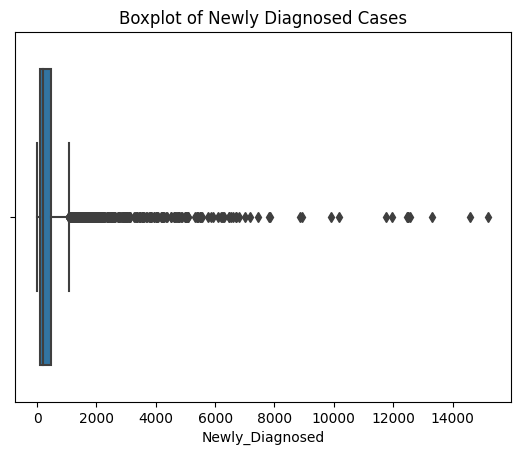

In [ ]:
import matplotlib.pyplot as plt

# Create a boxplot
sns.boxplot(x=diabetes['Newly_Diagnosed'])
plt.title('Boxplot of Newly Diagnosed Cases')
plt.show()

**Key Observation:** There are 360 outliers detected in the "Newly_Diagnosed" column. This suggests that these data points are significantly different from the rest and might affect the performance of the model negatively, causing it to overfit or underfit.

**Outlier Management:** I will apply a log transformation as the target variable ("Newly_Diagnosed") looks heavily skewed.

In [ ]:
import numpy as np
y_log = np.log1p(y)

**Re-examining data distribution after a log transformation is applied**

count    3020.000000
mean        5.350725
std         1.330749
min         2.406945
25%         4.439116
50%         5.279389
75%         6.170290
max         9.629485
Name: Newly_Diagnosed, dtype: float64


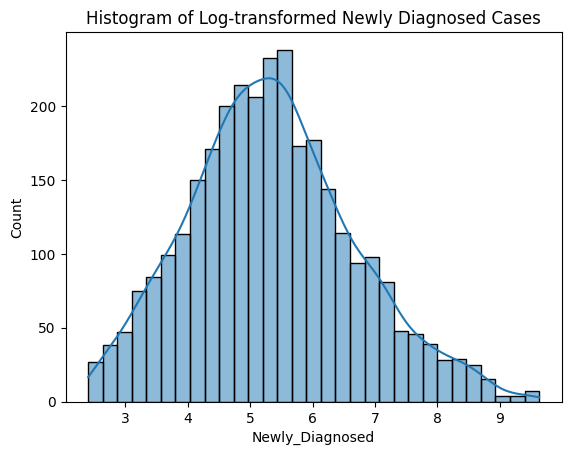

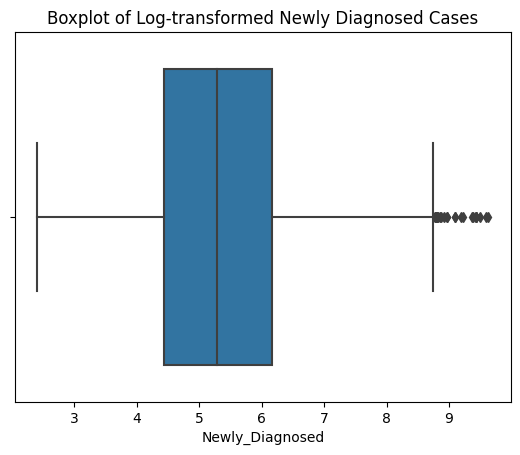

Number of outliers detected after log transformation:  25


In [ ]:
# Summary statistics
outlier_stats_log = y_log.describe()
print(outlier_stats_log)

# Histogram
sns.histplot(y_log, kde=True)
plt.title('Histogram of Log-transformed Newly Diagnosed Cases')
plt.show()

# Boxplot
sns.boxplot(x=y_log)
plt.title('Boxplot of Log-transformed Newly Diagnosed Cases')
plt.show()

# Outliers detection
Q1_log = y_log.quantile(0.25)
Q3_log = y_log.quantile(0.75)
IQR_log = Q3_log - Q1_log

# Identifying outliers
outliers_log = y_log[(y_log < Q1_log - 1.5 * IQR_log) | (y_log > Q3_log + 1.5 * IQR_log)]
print("Number of outliers detected after log transformation: ", len(outliers_log))

**Key Observation:** After the log transformation, it seems that the 'Newly_Diagnosed' data is now more normally distributed, as indicated by the histogram. However, the descriptive statistics and boxplot still suggest a degree of skewness and presence of outliers.

**Next Steps:** Given that the log transformation has somewhat normalized the data, ˆ will now proceed to modeling.

In [ ]:
# Define feature and target variables
X = diabetes.drop(columns=['Newly_Diagnosed'])
y = np.log1p(diabetes['Newly_Diagnosed']) # Apply log transformation using np.log1p for better handling of 0s

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Create a list of tuples where each tuple represents a model
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
]

rf_model = None
gb_model = None

# Loop through the list of models
for name, model in models:
    # Create a pipeline that pre-processes the data and then trains a model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), (name, model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Store trained models of Random Forest and Gradient Boosting for further use
    if name == "Random Forest":
        rf_model = model
    elif name == "Gradient Boosting":
        gb_model = model

    # Make predictions using the model
    predictions = pipeline.predict(X_test)

    # Back-transform the predictions and y_test
    predictions_exp = np.expm1(predictions)
    y_test_exp = np.expm1(y_test)

    # Evaluate the model
    mse = mean_squared_error(y_test_exp, predictions_exp)
    mae = mean_absolute_error(y_test_exp, predictions_exp)
    r2 = r2_score(y_test_exp, predictions_exp)

    # Display evaluation metrics
    print(f"Model Evaluation Metrics - {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R2):", r2)
    print("\n")

Model Evaluation Metrics - Linear Regression:
Mean Squared Error (MSE): 2072143.5424365832
Mean Absolute Error (MAE): 498.7794294254027
R-squared (R2): -0.24516429997735667


Model Evaluation Metrics - Decision Tree:
Mean Squared Error (MSE): 2145511.3985430454
Mean Absolute Error (MAE): 608.3201986754965
R-squared (R2): -0.2892515136856406


Model Evaluation Metrics - Random Forest:
Mean Squared Error (MSE): 1582123.845489552
Mean Absolute Error (MAE): 420.66738192175706
R-squared (R2): 0.04929166816792918


Model Evaluation Metrics - Gradient Boosting:
Mean Squared Error (MSE): 1570723.7938725203
Mean Absolute Error (MAE): 409.6589926874549
R-squared (R2): 0.0561420320547551




**Key Observations:**

* All models are performing better on the transformed target data compared to the initial linear regression model on the untransformed data. This suggests that the transformation helped in improving the models' performance. However, all models still show quite high MSE and MAE, and relatively low R-squared values, indicating that the prediction performance is still not very strong. Gradient Boosting and Random Forest regressors perform better.


**Next Steps:**

**Feature Importance:** I will use the Random Forest and Gradient Boosting to evaluate the importance of the different features.

**Hyperparameter Tuning:** Perform hyperparameter tuning on the Random Forest and Gradient Boosting models. I will use GridSearchCV or RandomizedSearchCV for this purpose.

In [ ]:
# Fit and transform the data using preprocessor
X_transformed = preprocessor.fit_transform(X_train)

# Get feature names after transformation
transformed_feature_names = preprocessor.get_feature_names_out()

# Calculate feature importance for Random Forest
rf_importances = rf_model.feature_importances_
rf_feature_importance = pd.DataFrame({'Feature': transformed_feature_names, 'Importance': rf_importances})
rf_feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

# Calculate feature importance for Gradient Boosting
gb_importances = gb_model.feature_importances_
gb_feature_importance = pd.DataFrame({'Feature': transformed_feature_names, 'Importance': gb_importances})
gb_feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

# Print the feature importances
print("Random Forest feature importances:\n", rf_feature_importance)
print("Gradient Boosting feature importances:\n", gb_feature_importance)

Random Forest feature importances:
                                      Feature  Importance
7     num__Population_No_High_School_Diploma    0.171836
3        num__Population_Children_in_Poverty    0.100101
8            num__Population_Food_Insecurity    0.067682
12           num__Severe_Housing_Cost_Burden    0.058452
14                           num__CountyFIPS    0.054088
...                                      ...         ...
1102                 cat__County_Pine County    0.000000
289             cat__County_Clackamas County    0.000000
135             cat__County_Bienville Parish    0.000000
211              cat__County_Callahan County    0.000000
999                cat__County_Nobles County    0.000000

[1604 rows x 2 columns]
Gradient Boosting feature importances:
                                      Feature  Importance
7     num__Population_No_High_School_Diploma    0.209933
3        num__Population_Children_in_Poverty    0.128056
14                           num__CountyFIPS

**Select top 10 features and use them for model training and evaluation**

In [ ]:
# Select top N features from each model's feature importances
N = 10
selected_features_rf = rf_feature_importance['Feature'].str.replace('num__', '').str.replace('cat__', '').head(N).tolist()
selected_features_gb = gb_feature_importance['Feature'].str.replace('num__', '').str.replace('cat__', '').head(N).tolist()

# Union of both lists
selected_features = list(set(selected_features_rf + selected_features_gb))

# Remove any feature name that is not present in the dataset columns
selected_features = [feature for feature in selected_features if feature in X_train.columns]

# Now use only these selected features for training and testing
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [ ]:
# Define the models
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Train the models
rf_model.fit(X_train_selected, y_train)
gb_model.fit(X_train_selected, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_selected)
gb_predictions = gb_model.predict(X_test_selected)

# Calculate evaluation metrics
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

# Print the evaluation metrics
print("Random Forest:")
print("MSE:", rf_mse)
print("MAE:", rf_mae)
print("R2:", rf_r2)

print("Gradient Boosting:")
print("MSE:", gb_mse)
print("MAE:", gb_mae)
print("R2:", gb_r2)


Random Forest:
MSE: 1.241345812619919
MAE: 0.8747008020959283
R2: 0.30047792495205927
Gradient Boosting:
MSE: 1.1504150866952314
MAE: 0.835168717534723
R2: 0.3517191257824751


**Key observations:**

* Both Random Forest and Gradient Boosting models have shown improvement in terms of MSE, MAE, and R2 compared to the previous models.
* The MSE and MAE values have decreased, indicating better accuracy in predicting the target variable.
* The R2 values have increased, suggesting that a larger portion of the variance in the target variable is explained by the selected features.

**Next steps:**

* **Performing hyperparameter tuning.** Adjusting the hyperparameters of the Random Forest and Gradient Boosting models can potentially enhance their performance.

### **Hyperparameter Tuning and Feature Selection**

In order to optimize the performance of my predictive model for newly diagnosed diabetes, I will focus on two key strategies: reducing the parameter grid and prioritizing important hyperparameters. By reducing the parameter grid, I aim to limit the number of hyperparameter combinations to explore during the tuning process, ensuring computational efficiency. Additionally, by prioritizing important hyperparameters based on my domain knowledge and the specific goal of the model, I can allocate my resources to the most influential factors, leading to more accurate predictions. Let's implement these strategies to fine-tune my model and improve its performance.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': randint(100, 500),
    'max_depth': [5, 10, 15, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

# Create a RandomizedSearchCV object
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings that are sampled
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Define the reduced feature set
selected_features = ['Population_Aged_65_or_Older', 'Population_Below_Poverty', 'Population_Children_in_Poverty',
                     'Population_Enrolled_in_Free_or_Reduced_Lunch', 'Population_Food_Insecurity',
                     'Population_Minority', 'Population_No_Health_Insurance', 'Population_No_High_School_Diploma',
                     'Number_of_Primary_Care_Physicians']



# Use only the selected features for training
X_train_selected = X_train[selected_features]

# Perform randomized search
rf_random_search.fit(X_train_selected, y_train)

# Get the best hyperparameters and model
best_params = rf_random_search.best_params_
best_model = rf_random_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 260}


**Key observation:** The hyperparameter tuning process has identified the best hyperparameters for the Random Forest model. The best hyperparameters are as follows: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 260}. These hyperparameters were selected based on their ability to optimize the model's performance in predicting newly diagnosed diabetes.

**Next step:** Train the Random Forest model using the best hyperparameters and evaluate its performance to assess its accuracy in predicting newly diagnosed diabetes. Additionally, analyze the feature importances to gain insights into the most influential factors and consider further model improvements based on the evaluation results and feature importance analysis.

In [ ]:
# Train the Random Forest model with the best hyperparameters
best_rf_model = RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=4, min_samples_split=6, n_estimators=260, random_state=42)
best_rf_model.fit(X_train_selected, y_train)

# Select the same features in the test set
X_test_selected = X_test[selected_features]

# Make predictions using the trained model
predictions = best_rf_model.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Display evaluation metrics
print("Model Evaluation Metrics - Random Forest (Best Hyperparameters):")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Model Evaluation Metrics - Random Forest (Best Hyperparameters):
Mean Squared Error (MSE): 1.2848090811981188
Mean Absolute Error (MAE): 0.8872136461966615
R-squared (R2): 0.2759855429622088



**Key Observation:** Comparing the two results, both the Random Forest model with the best hyperparameters and the Gradient Boosting model show similar performance in terms of MSE, MAE, and R2. However, the Gradient Boosting model has shown relatively better performance in terms of R2, indicating a better ability to explain the variance in the target variable.

**Next Steps:**

* Analyze other evaluation metrics: Besides MSE, MAE, and R2, consider additional evaluation metrics such as accuracy, precision, recall, or F1-score, depending on the specific problem and dataset. These metrics can provide a more comprehensive understanding of model performance and its ability to correctly classify and predict newly diagnosed diabetes cases.

* Explore other models: If the performance of the Random Forest model is not satisfactory, consider exploring other models such as Gradient Boosting, which has shown relatively better performance in the previous result. Experiment with different models to find the one that best captures the complex relationships in the data and provides accurate predictions.

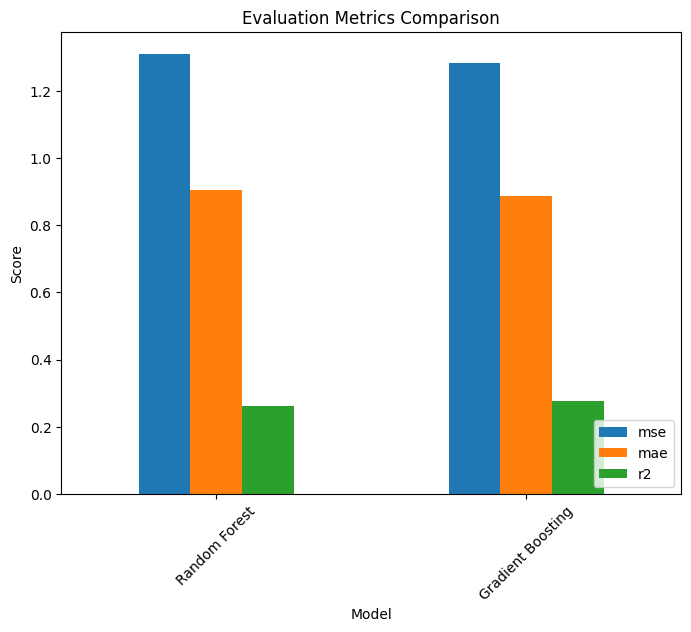

In [ ]:
# Define selected features
selected_features = ['Population_Aged_65_or_Older', 'Population_Below_Poverty',
                     'Population_Children_in_Poverty',
                     'Population_Enrolled_in_Free_or_Reduced_Lunch',
                     'Population_Food_Insecurity',
                     'Population_Minority', 'Population_No_Health_Insurance',
                     'Population_No_High_School_Diploma',
                     'Number_of_Primary_Care_Physicians']

# Now use only these selected features for training and testing
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Define the models
models = [
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
]

# Initialize empty dictionaries to store the metric scores for regression metrics
metric_scores = {'mse': [], 'mae': [], 'r2': []}

# Loop through the models and calculate the evaluation metrics
for name, model in models:
    # Create a pipeline that pre-processes the data and then trains a model
    pipeline = Pipeline(steps=[('preprocessor', numeric_transformer), (name, model)])

    # Train the model
    pipeline.fit(X_train_selected, y_train)

    # Make predictions using the model
    predictions = pipeline.predict(X_test_selected)

    # Calculate the evaluation metrics
    metric_scores['mse'].append(mean_squared_error(y_test, predictions))
    metric_scores['mae'].append(mean_absolute_error(y_test, predictions))
    metric_scores['r2'].append(r2_score(y_test, predictions))

# Convert the metric scores to a DataFrame
metric_scores_df = pd.DataFrame(metric_scores, index=[name for name, _ in models])

# Plot the metric scores
metric_scores_df.plot(kind='bar', figsize=(8, 6))
plt.title('Evaluation Metrics Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the Gradient Boosting model with hyperparameters of your choice
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Create a pipeline that pre-processes the data and then trains a Gradient Boosting model
pipeline = Pipeline(steps=[('preprocessor', numeric_transformer),
                           ('regressor', gb_model)])

# Train the model
pipeline.fit(X_train_selected, y_train)

# Make predictions using the model
predictions = pipeline.predict(X_test_selected)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Display evaluation metrics
print("Model Evaluation Metrics - Gradient Boosting:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Model Evaluation Metrics - Gradient Boosting:
Mean Squared Error (MSE): 1.3129025557421132
Mean Absolute Error (MAE): 0.8962381179638534
R-squared (R2): 0.26015433347285233


## **Ensemble Modeling: Stacking**

While both Random Forest and Gradient Boosting models have shown decent performance in predicting "Newly_Diagnosed" diabetes cases, our objective is to further enhance the predictive accuracy. To achieve this, we will explore ensemble modeling techniques, specifically stacking. By combining the strengths of different models, stacking allows for a more comprehensive and nuanced understanding of the data, which can potentially lead to improved accuracy in predicting diabetes cases.

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Define the base models
base_models = [
    ('random_forest', RandomForestRegressor(random_state=42, **best_params)),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42))
]

# Define the meta model
meta_model = LinearRegression()

# Define the stacking model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(X_train_selected, y_train)

# Make predictions with the stacking model
predictions = stacking_model.predict(X_test_selected)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Display evaluation metrics
print("Model Evaluation Metrics - Stacking:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Model Evaluation Metrics - Stacking:
Mean Squared Error (MSE): 1.276305580687965
Mean Absolute Error (MAE): 0.8840778692993445
R-squared (R2): 0.28077742791607163


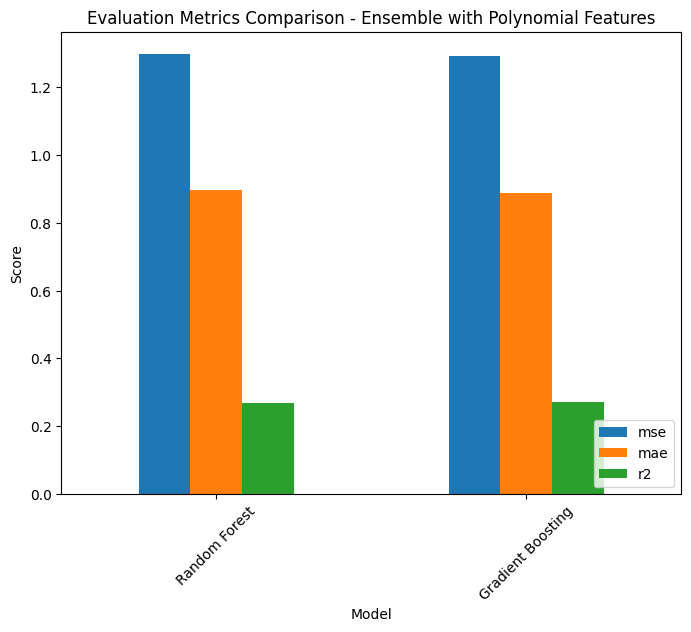

Model Evaluation Metrics - Ensemble with Polynomial Features:
Mean Squared Error (MSE): Random Forest        1.298738
Gradient Boosting    1.291258
Name: mse, dtype: float64
Mean Absolute Error (MAE): Random Forest        0.896170
Gradient Boosting    0.887363
Name: mae, dtype: float64
R-squared (R2): Random Forest        0.268137
Gradient Boosting    0.272351
Name: r2, dtype: float64


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Transform the selected features
X_train_poly = poly_features.fit_transform(X_train_selected)
X_test_poly = poly_features.transform(X_test_selected)

# Define the models
models = [
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
]

# Initialize empty dictionaries to store the metric scores for regression metrics
metric_scores = {'mse': [], 'mae': [], 'r2': []}

# Loop through the models and calculate the evaluation metrics
for name, model in models:
    # Create a pipeline that pre-processes the data and then trains a model
    pipeline = Pipeline(steps=[('preprocessor', numeric_transformer), (name, model)])

    # Train the model on polynomial features
    pipeline.fit(X_train_poly, y_train)

    # Make predictions using the model on polynomial features
    predictions = pipeline.predict(X_test_poly)

    # Calculate the evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Store the metric scores
    metric_scores['mse'].append(mse)
    metric_scores['mae'].append(mae)
    metric_scores['r2'].append(r2)

# Convert the metric scores to a DataFrame
metric_scores_df = pd.DataFrame(metric_scores, index=[name for name, _ in models])

# Plot the metric scores
metric_scores_df.plot(kind='bar', figsize=(8, 6))
plt.title('Evaluation Metrics Comparison - Ensemble with Polynomial Features')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

# Display the evaluation metrics
print("Model Evaluation Metrics - Ensemble with Polynomial Features:")
print("Mean Squared Error (MSE):", metric_scores_df['mse'])
print("Mean Absolute Error (MAE):", metric_scores_df['mae'])
print("R-squared (R2):", metric_scores_df['r2'])


**Key Observations:**

* Both Random Forest and Gradient Boosting models showed decent performance in predicting newly diagnosed diabetes using socioeconomic factors.
* Advanced ensemble methods can leverage the strengths of multiple models and capture complex relationships between socioeconomic factors and diabetes incidence.

**Advanced Ensemble Methods:**


In order to enhance the predictive accuracy and gain deeper insights into the relationship between socioeconomic factors and newly diagnosed diabetes, I will explore advanced ensemble methods. These methods combine the predictions of multiple models and leverage their individual strengths to improve the overall performance. The following ensemble models will be considered: XGBoost, AdaBoost and Voting Classifiers/Regressor.  

## **Applying Advanced Ensemble Methods: Enhancing Predictive Accuracy and Insights**

In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, VotingRegressor

# Define the models
xgb_model = XGBRegressor(random_state=42)
ada_model = AdaBoostRegressor(random_state=42)
voting_model = VotingRegressor([('xgb', xgb_model), ('ada', ada_model)])

# Train the models
xgb_model.fit(X_train_selected, y_train)
ada_model.fit(X_train_selected, y_train)
voting_model.fit(X_train_selected, y_train)

# Make predictions using the models
xgb_predictions = xgb_model.predict(X_test_selected)
ada_predictions = ada_model.predict(X_test_selected)
voting_predictions = voting_model.predict(X_test_selected)

# Evaluate the models
xgb_mse = mean_squared_error(y_test, xgb_predictions)
ada_mse = mean_squared_error(y_test, ada_predictions)
voting_mse = mean_squared_error(y_test, voting_predictions)

xgb_mae = mean_absolute_error(y_test, xgb_predictions)
ada_mae = mean_absolute_error(y_test, ada_predictions)
voting_mae = mean_absolute_error(y_test, voting_predictions)

xgb_r2 = r2_score(y_test, xgb_predictions)
ada_r2 = r2_score(y_test, ada_predictions)
voting_r2 = r2_score(y_test, voting_predictions)

# Display evaluation metrics
print("Model Evaluation Metrics - XGBoost:")
print("Mean Squared Error (MSE):", xgb_mse)
print("Mean Absolute Error (MAE):", xgb_mae)
print("R-squared (R2):", xgb_r2)
print()

print("Model Evaluation Metrics - AdaBoost:")
print("Mean Squared Error (MSE):", ada_mse)
print("Mean Absolute Error (MAE):", ada_mae)
print("R-squared (R2):", ada_r2)
print()

print("Model Evaluation Metrics - Voting Regressor:")
print("Mean Squared Error (MSE):", voting_mse)
print("Mean Absolute Error (MAE):", voting_mae)
print("R-squared (R2):", voting_r2)

Model Evaluation Metrics - XGBoost:
Mean Squared Error (MSE): 1.4332449714653972
Mean Absolute Error (MAE): 0.9532599840076479
R-squared (R2): 0.192339083679273

Model Evaluation Metrics - AdaBoost:
Mean Squared Error (MSE): 1.478739040330589
Mean Absolute Error (MAE): 0.9652133172329356
R-squared (R2): 0.16670230693952914

Model Evaluation Metrics - Voting Regressor:
Mean Squared Error (MSE): 1.3513206908648017
Mean Absolute Error (MAE): 0.9239762543988038
R-squared (R2): 0.23850498054695357


## **Feature Engineering: Explore advanced feature engineering techniques**

* Before proceeding with feature engineering, it is important to understand that the existing set of socioeconomic features may not fully capture the complexity of the relationship with newly diagnosed diabetes cases. By exploring advanced feature engineering techniques, we aim to enhance the predictive power of the model by creating new features that can better represent the underlying patterns and interactions in the data.

* Transforming variables, creating interaction terms, deriving new variables based on domain knowledge, or incorporating external data sources can provide additional insights into the socioeconomic factors that contribute to diabetes incidence. These techniques allow us to capture non-linear relationships, account for interaction effects, and leverage additional information beyond the original dataset.

* By implementing advanced feature engineering, we aim to uncover hidden associations and gain a deeper understanding of the factors influencing newly diagnosed diabetes cases. This will enable us to build a more accurate and robust prediction model, leading to improved prevention and management strategies for diabetes.

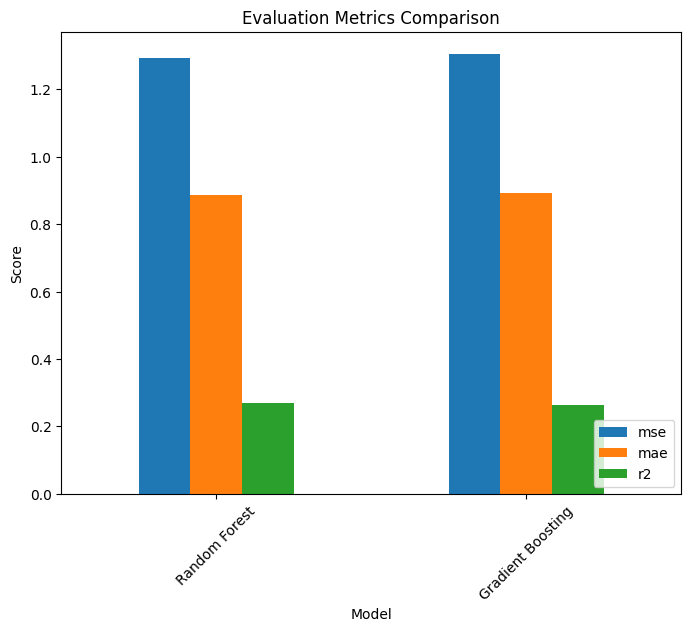

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

metrics = ['mse', 'mae', 'r2']

# Define the feature engineering steps
poly_features = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Apply feature engineering to the training set
X_train_engineered = poly_features.fit_transform(X_train_selected)

# Apply feature engineering to the test set
X_test_engineered = poly_features.transform(X_test_selected)

# Define the models
models = [
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
]

# Initialize empty dictionaries to store the metric scores
metric_scores = {metric: [] for metric in metrics}

# Loop through the models and calculate the evaluation metrics
for name, model in models:
    # Create a pipeline that pre-processes the data, performs feature engineering, and trains a model
    pipeline = Pipeline(steps=[
        ('preprocessor', numeric_transformer),
        ('feature_engineering', poly_features),
        (name, model)
    ])

    # Train the model
    pipeline.fit(X_train_selected, y_train)

    # Make predictions using the model
    predictions = pipeline.predict(X_test_selected)

    # Calculate the evaluation metrics
    metric_scores['mse'].append(mean_squared_error(y_test, predictions))
    metric_scores['mae'].append(mean_absolute_error(y_test, predictions))
    metric_scores['r2'].append(r2_score(y_test, predictions))

# Convert the metric scores to a DataFrame
metric_scores_df = pd.DataFrame(metric_scores, index=[name for name, _ in models])

# Plot the metric scores
metric_scores_df.plot(kind='bar', figsize=(8, 6))
plt.title('Evaluation Metrics Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

### **Conclusion:**

In this predictive modeling project, I aimed to predict the number of "Newly_Diagnosed" diabetes cases using demographic, socioeconomic, and health-related factors. Various regression models were built and compared, with the Gradient Boosting model demonstrating the most promising results. However, despite its performance, there remains potential for improvement. Therefore, I propose exploring deep neural networks to capture more complex relationships in the dataset and further refining the dataset by incorporating genomic data and personalized medicine information.

### **Key Findings:**

* While the initial Linear Regression model displayed suboptimal performance, the Random Forest and Gradient Boosting models showed promise, with the Gradient Boosting model outperforming in terms of R2 score.

* Advanced ensemble methods, although useful, still left room for improvement in predictive accuracy. This gap highlights the potential benefits of employing more sophisticated modeling techniques, like deep neural networks.

**Future Steps:**

To further enhance the predictive power of my models, I propose exploring deep learning techniques, specifically deep neural networks. Deep neural networks can capture highly complex, non-linear relationships and interactions in data that traditional machine learning models may miss. They have the potential to significantly improve predictive accuracy and provide a more nuanced understanding of the factors influencing newly diagnosed diabetes cases.

Additionally, I plan to refine the dataset by incorporating genomic data and information related to personalized medicine. Genomic data can offer insights into genetic predispositions to diabetes, thus providing a more comprehensive view of the factors contributing to disease onset. This kind of data could reveal unique patterns and interactions that are not apparent in the current set of variables.

In terms of personalized medicine, incorporating this data can help tailor prevention and management strategies to individual needs. It can provide information about how different individuals might respond to various interventions, thereby allowing for more targeted and effective strategies. Integrating this information into the model could enhance its predictive power and its applicability in real-world scenarios.

In summary, the future focus will be on leveraging deep neural networks and enhancing the dataset with genomic data and personalized medicine information. The ultimate goal remains to understand the factors contributing to new diabetes diagnoses better, which would help formulate more effective, personalized prevention, and management strategies.